# Linear Models for Predicting Continuous Values

## Linear Structure

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

Given $N$ observations, $\xv_n$, for $n=1,\ldots,N$, and target values,
$t_n$, for $n=1,\ldots,N$, what is the simplest model,
$y(\xv)$, you can think of?

$$
y(\xv) = 0
$$

or maybe

$$
y(\xv) = c
$$

What is next simplest model?

$$
\begin{align*}
   y(\xv;\wv) &= w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D \\
   &= w_0 + \sum_{i=1}^D w_i x_i \\
   & = \sum_{i=0}^D w_i x_i \mbox{, where } x_0 = 1 \\
   &= \wv^T \xv
\end{align*}
$$

  * This is nice because it is linear in the parameters $\wv$; optimizations based on derivatives might be solvable analytically.
  * This is not so nice, because it is also linear in the inputs, $\xv$; greatly limits the complexity of the model.
  *  But, a model linear in the inputs might be the best you can do for many cases, such as a sparsely sampled distribution, process, population, thing...whatever it is you want to model.


## Fitting Data Samples with a Linear Model

In [1]:
from IPython.display import Image
Image(url='http://www.cs.colostate.edu/~anderson/cs545/notebooks/springs.png')

Force exerted by spring is proportional to its length. The potential
energy stored in the spring is proportinal to the square of its length.
Say we want the rod to settle at position that minimizes the potential
energy in the springs.
$$
\begin{align*}
\sum_{n=1}^N (t_n - y(\xv_n;\wv))^2
\end{align*}
$$

If $y$ is an affine (linear + constant) function of $x$,
$$
    y(\xv;\wv) = w_0 + w_1 x
$$
with parameters $\wv = (w_0, w_1)$, which parameter values give best fit?
$$
    \wv_{\mbox{best}} = \argmin{\wv} \sum_{n=1}^N (t_n - y(x_n ; \wv))^2
$$

Set derivative (gradient) with respect to $\wv$ to zero and
solve for $\wv$.  Let's do this with matrices.  

Collect all targets into matrix $T$ and $x$ samples into matrix
$X$. ($N$=number samples, $D$=sample dimensionality)
$$
  \begin{align*}
    T &= \begin{bmatrix}
      t_1 \\ t_2 \\ \vdots \\ t_N
    \end{bmatrix} \\
    X &= \begin{bmatrix}
      x_{1,0} & x_{1,1} & x_{1,2} & \dotsc & x_{1,D} \\
      x_{2,0} & x_{2,1} & x_{2,2} & \dotsc & x_{2,D} \\
      \vdots \\
      x_{N,0} & x_{N,1} & x_{N,2} & \dotsc & x_{N,D}
    \end{bmatrix}\\
    \wv &= \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_D \end{bmatrix}
  \end{align*}
$$

Collection of all differences is $T - X\wv$, which is an $N \times
1$ matrix.  To form the square of all values and add them up, just
do a dot product $(T-X\wv)^T (T-X\wv)$.  



Now we can express the minimum sum of squared error criterion

$$
\begin{align*}
\sum_{n=1}^N (t_n - y(\xv_n;\wv))^2 & =  (T-X\wv)^T (T-X\wv)
\end{align*}
$$

Do some algebra before taking the derivative.

$$
    \begin{align*}
      (T- X\wv)^T (T-X\wv) &= (T^T - (X\wv)^T) (T-X\wv)\\
      &= (T^T - \wv^TX^T) (T-X\wv)\\
      &= T^TT - T^TX\wv - \wv^TX^TT + \wv^TX^TX\wv
    \end{align*}
$$

Simplify?  What are sizes of each term? 

$$
    \begin{align*}
      T^TT & \mbox{ is } (1 \times N)(N \times 1) = 1 \times 1\\
      T^TX\wv & \mbox{ is } (1 \times N)(N \times D)(D \times 1) = 1 \times 1\\
      \wv^TX^TT & \mbox{ is } (1 \times D)(D \times N)(N \times 1) = 1 \times 1\\
      \wv^TX^TX\wv & \mbox{ is } (1 \times D)(D \times N)(N \times D)(D
      \times 1) = 1 \times 1\\
    \end{align*}
$$

So

$$
    \begin{align*}
      (T-X\wv)^T (T-X\wv) &= T^TT  - 2 T^TX\wv  + \wv^TX^TX\wv
    \end{align*}
$$

Now, let's do the derivative.

$$
    \begin{align*}
      & \frac{\partial (T-X\wv)^T  (T-X\wv)}{\partial \wv} \\
      & \;\;\; = -2 \frac{\partial T^T X \wv}{\partial \wv} + \frac{\partial
        \wv^T X^T X \wv}{\partial \wv}\\
      & \;\;\; = -2 T^T X + 2 X^T X \wv
    \end{align*}
$$

Help for some of the above steps (thanks for asking, John):
  * Since $T^TX\wv$ and $\wv^TX^TT$ are both scalars, $T^TX\wv = (T^TX\wv)^T= \wv^TX^TT$, so we can combine them to get $2T^TX\wv$.
  * From page 697 of our text (and [Wikipedia entry on Matrix Calculus](http://en.wikipedia.org/wiki/Matrix_calculus)), $\;\;\partial \wv^T A \wv / \partial \wv = A\wv + A^T \wv$, so
  
$$
\begin{align*}
\frac{\partial \wv^T X^T X \wv}{\partial \wv} &= X^T X \wv + (X^T X)^T \wv \\
&  = 2 X^T X \wv
\end{align*}
$$

because $X^T X = (X^T X)^T$, since $X^T X$ is symmetric.

Setting the above derivative equal to zero we find

$$
    \begin{align*}
      0 &= -2 T^T X + 2 X^T X \wv \\
      X^T X \wv &=  T^T X \\
      (\wv^T X^T X)^T &=  (T^T X)^T \\
      X^T X \wv &=  X^T T \\
      \wv &= (X^T X)^{-1} X^T T\\
    \end{align*}
$$


And, in python

    w = np.dot( np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,T) )

or, you may use the *solve* function that assumes $\Xv^T \Xv$ is full rank (no linearly dependent columns),

    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T, T))

or, better yet, use the *lstsq* function that does not make that assumption. 

    w = np.linalg.lstsq(np.dot(X.T,X), np.dot(X.T, T))

## Application

Try the [automobile data set](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) at UCI Machine Learning Database 
Repository. Download
*auto-mpg.data* and *auto-mpg.names* from the "Data Folder" link
near the top of the web page.

First, take a look at *auto-mpg.names*.  There you will learn that there are 398 samples, each with 8 numerical attributes and one string attribute. Their names are

   1. mpg:           continuous
   2. cylinders:     multi-valued discrete
   3. displacement:  continuous
   4. horsepower:    continuous
   5. weight:        continuous
   6. acceleration:  continuous
   7. model year:    multi-valued discrete
   8. origin:        multi-valued discrete
   9. car name:      string (unique for each instance)

First step, read it into python and look at it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Take a look at a few lines of the data file to figure out how to read it in.

In [3]:
!head -40 auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"
15.0   8   383.0      170.0      3563.      10.0   70  1	"dodge challenger se"
14.0   8   340.0      160.0      3609.       8.0   70  1	"plymouth 'cuda 340"
15.0   8   400.0      150.0      3761.       9.5   70  1	"chevrolet monte ca

Instead of relying on the *pandas* package to read this data, let's try using the simpler *numpy.loadtxt* function.
We see that each line contains a sample consisting of 8 numbers and
one string.  However, first we have to figure out how to deal with the
missing values. The documentation for *numpy.loadtxt* reveals that
the *converters* argument can be used to specify a function to apply
to the values from particular columns of data.  We can use this to
deal with the missing values.  Looking at *auto-mpg.data* we see
that the missing values are marked with question marks.  These are all in the fourth column, the horsepower attribute.

Here is a simple function that translates '?' to NaN (*np.nan*) and anything else is converted to a floating point number.

In [8]:
def missingIsNan(s):
    if s == b'?':  # single character read as b'?' != '?'
        return np.nan
    else:
        return float(s)
    
print(missingIsNan('12.32'))
print(missingIsNan(b'?'))

12.32
nan


Hey, why not get fancy and write a one-liner?

In [9]:
def missingIsNan(s):
    return np.nan if s == b'?' else float(s)

print(missingIsNan('12.32'))
print(missingIsNan(b'?'))

12.32
nan


The *converters* argument to *np.loadtxt* accepts a python dictionary, which is python's associative array structure.

In [10]:
d = {1: 'a', 2: 'yo', 3: 42, 4: missingIsNan}
d

{1: 'a', 2: 'yo', 3: 42, 4: <function __main__.missingIsNan>}

In [11]:
d[1]

'a'

In [12]:
d[4]

<function __main__.missingIsNan>

In [13]:
d[4](b'?')

nan

Let's also restrict *np.loadtxt* to reading just the first 8 columns to avoid dealing with the string in the 9th column.

In [14]:
data = np.loadtxt('auto-mpg.data', usecols=range(8), converters={3: missingIsNan})

In [15]:
data.shape

(398, 8)

In [16]:
data[:3,:]

array([[  1.80000000e+01,   8.00000000e+00,   3.07000000e+02,
          1.30000000e+02,   3.50400000e+03,   1.20000000e+01,
          7.00000000e+01,   1.00000000e+00],
       [  1.50000000e+01,   8.00000000e+00,   3.50000000e+02,
          1.65000000e+02,   3.69300000e+03,   1.15000000e+01,
          7.00000000e+01,   1.00000000e+00],
       [  1.80000000e+01,   8.00000000e+00,   3.18000000e+02,
          1.50000000e+02,   3.43600000e+03,   1.10000000e+01,
          7.00000000e+01,   1.00000000e+00]])

We can change the precision that ipython uses to display floating point values.

In [17]:
%precision 3

'%.3f'

In [18]:
data[:3,:]

array([[  1.800e+01,   8.000e+00,   3.070e+02,   1.300e+02,   3.504e+03,
          1.200e+01,   7.000e+01,   1.000e+00],
       [  1.500e+01,   8.000e+00,   3.500e+02,   1.650e+02,   3.693e+03,
          1.150e+01,   7.000e+01,   1.000e+00],
       [  1.800e+01,   8.000e+00,   3.180e+02,   1.500e+02,   3.436e+03,
          1.100e+01,   7.000e+01,   1.000e+00]])

As we have done before, we must find the missing values.  Let's just remove the samples with missing values.

In [19]:
np.isnan(data)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [20]:
np.sum(np.isnan(data))

6

In [21]:
np.sum(np.isnan(data), axis=0)

array([0, 0, 0, 6, 0, 0, 0, 0])

What does this result tell us?

Yep, all 6 *NaN* values are in the fourth column, the horsepower column.

Let's just
remove those 6 samples from the array.  To do this build a boolean
mask of length equal to the number of rows in *data* that is
*False* except for any row that contains a NaN.  We can use the
*np.any* or *np.all* methods to combine boolean values in each row or column. First, always try
such ideas in multiple steps, checking each step.

In [22]:
nans = np.isnan(data)
nans.shape

(398, 8)

In [23]:
nans.any(axis=0).shape

(8,)

In [24]:
nans.any(axis=1).shape

(398,)

That's the one we want, a boolean value for each row, or sample.

In [25]:
goodRowsMask = nans.any(axis=1)
goodRowsMask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [26]:
dataNew = data[goodRowsMask,:]
dataNew.shape

(6, 8)

Wait a minute!  This gives us only 6 samples.  We wanted all samples but these 6, right?

In [27]:
dataNew

array([[  2.500e+01,   4.000e+00,   9.800e+01,         nan,   2.046e+03,
          1.900e+01,   7.100e+01,   1.000e+00],
       [  2.100e+01,   6.000e+00,   2.000e+02,         nan,   2.875e+03,
          1.700e+01,   7.400e+01,   1.000e+00],
       [  4.090e+01,   4.000e+00,   8.500e+01,         nan,   1.835e+03,
          1.730e+01,   8.000e+01,   2.000e+00],
       [  2.360e+01,   4.000e+00,   1.400e+02,         nan,   2.905e+03,
          1.430e+01,   8.000e+01,   1.000e+00],
       [  3.450e+01,   4.000e+00,   1.000e+02,         nan,   2.320e+03,
          1.580e+01,   8.100e+01,   2.000e+00],
       [  2.300e+01,   4.000e+00,   1.510e+02,         nan,   3.035e+03,
          2.050e+01,   8.200e+01,   1.000e+00]])

So, let's change all *False* values to *True* and *True* values to *False*.

In [28]:
goodRowsMask = np.logical_not(goodRowsMask)

In [29]:
dataNew = data[goodRowsMask,:]
dataNew.shape

(392, 8)

In [30]:
dataNew[:3,:]

array([[  1.800e+01,   8.000e+00,   3.070e+02,   1.300e+02,   3.504e+03,
          1.200e+01,   7.000e+01,   1.000e+00],
       [  1.500e+01,   8.000e+00,   3.500e+02,   1.650e+02,   3.693e+03,
          1.150e+01,   7.000e+01,   1.000e+00],
       [  1.800e+01,   8.000e+00,   3.180e+02,   1.500e+02,   3.436e+03,
          1.100e+01,   7.000e+01,   1.000e+00]])

In [31]:
np.sum(np.isnan(dataNew),axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0])

Remember, the next step after reading data into python is to visualize
it.  One thing we can do is just plot the value of each attribute in a
separate graph.  Let's make an array of column names to label the y axes.

In [32]:
names =  ['mpg','cylinders','displacement','horsepower','weight',
          'acceleration','year','origin']

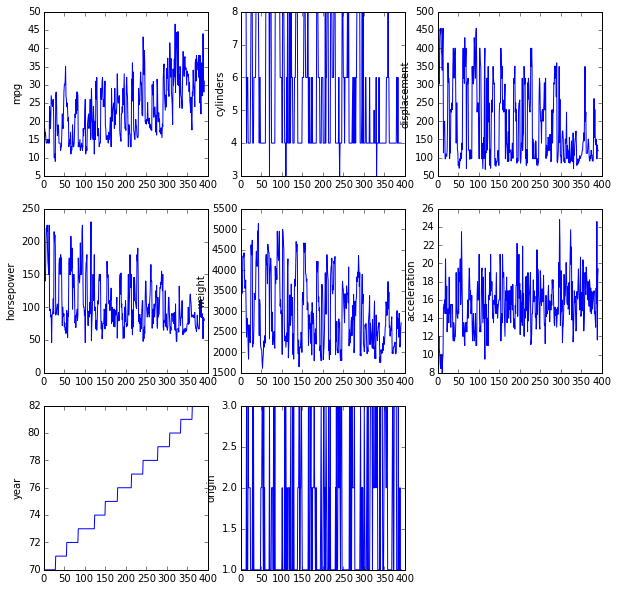

In [33]:
plt.figure(figsize=(10,10))
nrow,ncol = dataNew.shape
for c in range(ncol):
    plt.subplot(3,3, c+1)
    plt.plot(dataNew[:,c])
    plt.ylabel(names[c])

What is interesting to you in these graphs?

Let's try to predict miles per gallon, *mpg*, from the other attributes.  To set this up, let's make a 392 x 1 column vector, *T*, of target values containing all of the *mpg* values, and a 392 x 7 matrix, *X*, to hold the inputs to our model.

In [34]:
names

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [35]:
T = dataNew[:, 0:1]  # dataNew[:,0] results in a one-dimensional matrix, dataNew[:,0:1] preserves its two-dimensional nature.

In [36]:
X = dataNew[:, 1:]

In [37]:
X.shape, T.shape

((392, 7), (392, 1))

In [38]:
Xnames = names[1:]
Tname = names[0]
Xnames,Tname

(['cylinders',
  'displacement',
  'horsepower',
  'weight',
  'acceleration',
  'year',
  'origin'],
 'mpg')

Now, let's see if a linear model makes some sense by plotting the target values versus each of the input variables.

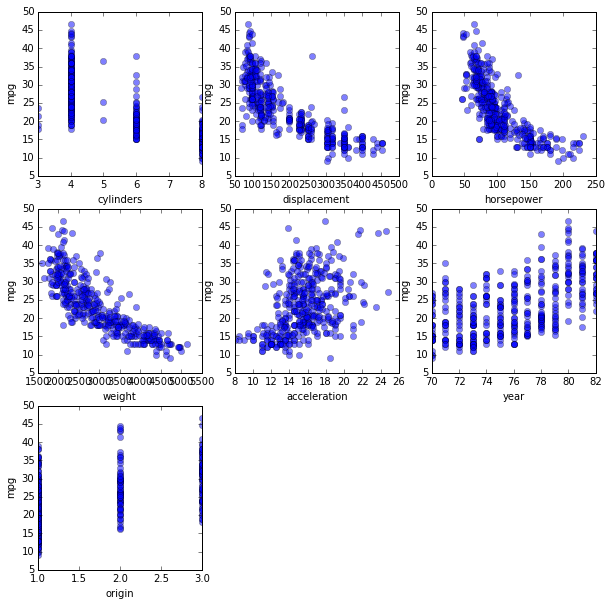

In [39]:
plt.figure(figsize=(10,10))
for c in range(X.shape[1]):
    plt.subplot(3,3, c+1)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])

What do you think?  Are there any linear relationships between the individual input variables and the target variable?  Do they make sense, given your knowledge of automobiles?

Now, to build the linear model.  First, let's tack on a column of constant 1 values to the left side of *X*.  With this addition, our matrix multiplication takes care of the $w_0$ coefficient as described above.

In [40]:
X1 = np.hstack((np.ones((X.shape[0],1)), X))
X.shape, X1.shape

((392, 7), (392, 8))

In [41]:
X1[:3,:]

array([[  1.000e+00,   8.000e+00,   3.070e+02,   1.300e+02,   3.504e+03,
          1.200e+01,   7.000e+01,   1.000e+00],
       [  1.000e+00,   8.000e+00,   3.500e+02,   1.650e+02,   3.693e+03,
          1.150e+01,   7.000e+01,   1.000e+00],
       [  1.000e+00,   8.000e+00,   3.180e+02,   1.500e+02,   3.436e+03,
          1.100e+01,   7.000e+01,   1.000e+00]])

And, let's add a name to *Xnames*.

In [42]:
Xnames.insert(0, 'bias')
Xnames

['bias',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

We could try to fit a linear model to all of the data and check to see
how accurately we predict *mpg* for each sample.  However, this will
give a much too optimistic expectation of how well the model will do
on new data.

A much better way to evaluate a model is to remove, or hold out, some
of the samples from the data set used to fit the model.  Then apply
the model to the held out samples and compare the predicted *mpg*
with the actual *mpg*.  Call these held out samples the **test set**
and the other samples used to fit the model the **train set**.  

How should we partition the data into these two disjoint subsets?  A
common practice is to randomly select 80% of the samples as training
samples and use the remaining 20% of the samples as testing samples.

To partition our samples (rows of *X* and *T*) into training and test sets, let's deal with just the row indices.  Then we will use the same selected row indices to slice out corresponding rows of *X* and *T*.

In [43]:
nrows = X1.shape[0]
nTrain = int(round(nrow*0.8))
nTest = nrow - nTrain
nTrain,nTest,nTrain+nTest

(314, 78, 392)

In [44]:
rows = np.arange(nrows)
np.random.shuffle(rows)
rows

array([276, 122, 257, 217, 261, 223, 390,  47, 253, 170,  38, 389, 125,
       128,  71, 181, 364, 244,  18, 146, 205, 366, 213,   1,  63,  91,
       277, 243, 221, 238, 262,   3, 357, 180, 136, 270, 154, 135, 228,
       227, 161, 255, 318, 374, 347, 275, 242,  59, 214, 313, 229, 232,
        46, 147,  92, 341, 211, 333, 236, 350, 177,  35, 198, 139,  30,
       311, 344, 287, 376, 373, 132,   8, 268, 188, 265, 138, 166, 182,
       159, 197, 337, 104, 206, 216, 324,  54,  72, 252, 150, 391,  94,
       235, 266, 326, 141,  43, 314, 334, 208,  44, 116,  41,   5, 381,
       148, 263, 209, 149, 323,  74, 107, 305, 185, 315, 218, 325, 233,
       354, 330, 365, 204,  83, 370,  95, 164, 319, 259,  11, 193, 380,
       117, 241, 105, 279, 278, 184, 234, 304,  22, 356, 152, 212, 220,
        29, 292, 108,  68,  57, 285,  97, 320, 119,  78,  60, 112,  34,
       186, 172, 353,  88, 385, 162, 106,  40,  62, 245, 267, 298,  82,
       332, 115, 225, 251, 167, 124,  58, 171, 256,  16, 281, 34

In [45]:
trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]
trainIndices,testIndices

(array([276, 122, 257, 217, 261, 223, 390,  47, 253, 170,  38, 389, 125,
        128,  71, 181, 364, 244,  18, 146, 205, 366, 213,   1,  63,  91,
        277, 243, 221, 238, 262,   3, 357, 180, 136, 270, 154, 135, 228,
        227, 161, 255, 318, 374, 347, 275, 242,  59, 214, 313, 229, 232,
         46, 147,  92, 341, 211, 333, 236, 350, 177,  35, 198, 139,  30,
        311, 344, 287, 376, 373, 132,   8, 268, 188, 265, 138, 166, 182,
        159, 197, 337, 104, 206, 216, 324,  54,  72, 252, 150, 391,  94,
        235, 266, 326, 141,  43, 314, 334, 208,  44, 116,  41,   5, 381,
        148, 263, 209, 149, 323,  74, 107, 305, 185, 315, 218, 325, 233,
        354, 330, 365, 204,  83, 370,  95, 164, 319, 259,  11, 193, 380,
        117, 241, 105, 279, 278, 184, 234, 304,  22, 356, 152, 212, 220,
         29, 292, 108,  68,  57, 285,  97, 320, 119,  78,  60, 112,  34,
        186, 172, 353,  88, 385, 162, 106,  40,  62, 245, 267, 298,  82,
        332, 115, 225, 251, 167, 124,  58, 171, 256

Check that the training and testing sets are disjoint.

In [46]:
np.intersect1d(trainIndices, testIndices)

array([], dtype=int64)

In [47]:
Xtrain = X1[trainIndices,:]
Ttrain = T[trainIndices,:]
Xtest = X1[testIndices,:]
Ttest = T[testIndices,:]
Xtrain.shape,Ttrain.shape, Xtest.shape,Ttest.shape

((314, 8), (314, 1), (78, 8), (78, 1))

We want to solve for $\wv$ in the equation  $X^T X \wv =  X^T T$.
This is done with the *numpy.linalg.lstsq* function.  Don't be confused by the *T*s.  Remember *something.T* is the
transpose of *something*.

In [48]:
w = np.linalg.lstsq(np.dot(Xtrain.T,Xtrain), np.dot(Xtrain.T, Ttrain))
w = w[0] # to only keep the weights, and discard other information returned by lstsq
w

array([[ -1.809e+01],
       [ -6.199e-01],
       [  1.534e-02],
       [ -1.023e-02],
       [ -6.108e-03],
       [  7.022e-02],
       [  7.651e-01],
       [  1.293e+00]])

In [49]:
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name))

 -18.094  bias
  -0.620  cylinders
   0.015  displacement
  -0.010  horsepower
  -0.006  weight
   0.070  acceleration
   0.765  year
   1.293  origin


How can you figure out what *np.linalg.lstsq* is doing?  Try finding the source code!

In [50]:
!locate linalg.py

/usr/lib64/python2.7/site-packages/numpy/linalg/linalg.py
/usr/lib64/python2.7/site-packages/numpy/linalg/linalg.pyc
/usr/lib64/python2.7/site-packages/numpy/linalg/linalg.pyo
/usr/lib64/python2.7/site-packages/numpy/linalg/tests/test_linalg.py
/usr/lib64/python2.7/site-packages/numpy/linalg/tests/test_linalg.py.xerbla
/usr/lib64/python2.7/site-packages/numpy/linalg/tests/test_linalg.pyc
/usr/lib64/python2.7/site-packages/numpy/linalg/tests/test_linalg.pyo
/usr/lib64/python2.7/site-packages/scipy/linalg/flinalg.py
/usr/lib64/python2.7/site-packages/scipy/linalg/flinalg.pyc
/usr/lib64/python2.7/site-packages/scipy/linalg/flinalg.pyo
/usr/lib64/python3.4/site-packages/numpy/linalg/linalg.py
/usr/lib64/python3.4/site-packages/numpy/linalg/tests/test_linalg.py
/usr/lib64/python3.4/site-packages/numpy/linalg/tests/test_linalg.py.xerbla


In my version I see documentation for *lstsq* that states

    Return the least-squares solution to a linear matrix equation.

    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.


Now that we have a linear model, which is simply $w$, let's use it to predict *mpg* for some samples.

In [51]:
predict = np.dot(X1[:4,:],w)
predict

array([[ 14.613],
       [ 13.724],
       [ 14.922],
       [ 14.796]])

How do these predictions compare with the actual *mpg* values?  We can either make a two column matrix, or use a *for* loop to print them.

In [52]:
np.hstack(( predict, Ttrain[:4,:]))

array([[ 14.613,  31.5  ],
       [ 13.724,  20.   ],
       [ 14.922,  20.8  ],
       [ 14.796,  25.5  ]])

In [53]:
print('{:^5} {:^5}'.format('P','T'))
for (p,t) in zip(predict,Ttrain[0:4,:]):
    # print(p,t)
    print('{:5.2f} {:5.2f}'.format(p[0],t[0]))

  P     T  
14.61 31.50
13.72 20.00
14.92 20.80
14.80 25.50


Let's try all of the test data and plot the results.

In [54]:
predict = np.dot(Xtest, w)
predict.shape, Ttest.shape

((78, 1), (78, 1))

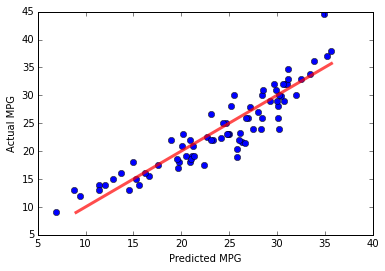

In [55]:
plt.plot(predict,Ttest,'o')
plt.xlabel('Predicted MPG')
plt.ylabel('Actual MPG')
# add a 45 degree line
a = max(min(predict),min(Ttest))
b = min(max(predict),max(Ttest))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.7);

Not too shabby!  But, how about a numerical measure of accuracy?  

Right, just calculate the root-mean-square error (RMSE).

In [56]:
np.sqrt( np.mean( (np.dot(Xtest,w) - Ttest)**2))

2.794

This means we are about 3.1 mpg off in our predictions, on average.

## Importance of Attributes (Input Variables)

Here again are the weights we learned before for predicting *mpg*.
Can we use these to decide which attibutes are most important?  Can
we remove some from the model?


In [57]:
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name))

 -18.094  bias
  -0.620  cylinders
   0.015  displacement
  -0.010  horsepower
  -0.006  weight
   0.070  acceleration
   0.765  year
   1.293  origin


Perhaps year and origin are the most significant.  Does this make sense?

A weight
magnitude is determined not only by the linear relationship between the corresponding input variable with
the target, but also by the variable's range.

What are the ranges of the input variables?

In [58]:
for n,mn,mx in zip(Xnames,np.min(X1,axis=0),np.max(X1,axis=0)):
    print('{:>20} {:8.2f} {:8.2f}'.format(n,mn,mx))

                bias     1.00     1.00
           cylinders     3.00     8.00
        displacement    68.00   455.00
          horsepower    46.00   230.00
              weight  1613.00  5140.00
        acceleration     8.00    24.80
                year    70.00    82.00
              origin     1.00     3.00


The weight for *weight* is the smallest magnitude, but the range of its values are the largest.

The weight for *origin* is the largest, but the range of its values are the smallest.

If we could remove the effect of the ranges on the weight magnitudes, we could use the weight magnitudes to judge the relative importance of each input variable. How?

A common approach is to *standardize* the input variables by adjusting the values to have zero mean and unit variance.  

In [59]:
Xs = (X - X.mean(axis=0)) / X.std(axis=0)
Xs.shape

(392, 7)

In [60]:
Xs.mean(0)

array([ -2.169e-16,  -2.538e-16,  -3.965e-16,   6.840e-17,   6.241e-15,
        -4.384e-16,   2.334e-16])

In [61]:
Xs.std(0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

To do this correctly when partitioning data into training and testing sets, we must always calculate means and standard deviations using only the training set, and use the same means and standard deviations when standardizing the testing set.  Remember, you must not use any information about the testing set when building a model.  If you do, your test error will be lower than it will be when you truly see new data.

You can do this by storing the means and standard deviations obtained from the training data, and just use them when standardizing the testing data.

Another way is to construct functions for standardizing that include the calculated means and standard deviations as local variables, by using [function closures](http://www.openbookproject.net/py4fun/decorator/decorator.html).

In [62]:
def makeStandardize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    def standardize(origX):
        return (origX - means) / stds
    
    def unStandardize(stdX):
        return stds * stdX + means
    
    return (standardize, unStandardize)

Let's start with *X* again, and tack on the column of 1's after dividing data into training and testing partitions.

In [63]:
Xtrain = X[trainIndices,:]
Ttrain = T[trainIndices,:]
Xtest = X[testIndices,:]
Ttest = T[testIndices,:]

(standardize, unStandardize) = makeStandardize(Xtrain)

XtrainS = standardize(Xtrain)
XtestS = standardize(Xtest)

np.mean(XtrainS,axis=0), np.std(XtrainS,axis=0), np.mean(XtestS,axis=0), np.std(XtestS,axis=0)

(array([ -2.977e-16,  -1.195e-16,  -1.298e-16,  -1.078e-16,   2.378e-15,
         -5.579e-16,  -1.892e-16]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([-0.121, -0.135, -0.125, -0.148,  0.098, -0.071,  0.142]),
 array([ 1.019,  0.97 ,  0.88 ,  0.995,  0.907,  0.974,  1.062]))

Notice that the means and standard deviations for the testing set are not as close to 0 and 1 as they are for the training set.  Why?

Now we can tack on the column of 1's, solve for *w*, and examine the weight magnitudes.

In [64]:
XtrainS1 = np.hstack((np.ones((XtrainS.shape[0],1)), XtrainS))
XtestS1 = np.hstack((np.ones((XtestS.shape[0],1)), XtestS))
w = np.linalg.lstsq( np.dot(XtrainS1.T,XtrainS1), np.dot(XtrainS1.T, Ttrain))[0]  # see this [0]?
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name))

  23.362  bias
  -1.051  cylinders
   1.610  displacement
  -0.402  horsepower
  -5.178  weight
   0.197  acceleration
   2.828  year
   1.026  origin


Now what do you observe about the relative magnitudes?  If you had a ton of input variables, it would be easier to see if we sorted them by their magnitudes.

In [65]:
np.abs(w)

array([[ 23.362],
       [  1.051],
       [  1.61 ],
       [  0.402],
       [  5.178],
       [  0.197],
       [  2.828],
       [  1.026]])

In [66]:
np.argsort(np.abs(w.flat))

array([5, 3, 7, 1, 2, 6, 4, 0])

In [67]:
np.argsort(np.abs(w.flat))[::-1]

array([0, 4, 6, 2, 1, 7, 3, 5])

In [68]:
sortedOrder = np.argsort(np.abs(w.flat))[::-1]
Xnames = np.array(Xnames)
for wi,name in zip(w.flat[sortedOrder],Xnames[sortedOrder]):
    print('{:8.3f}  {:s}'.format(wi,name))

  23.362  bias
  -5.178  weight
   2.828  year
   1.610  displacement
  -1.051  cylinders
   1.026  origin
  -0.402  horsepower
   0.197  acceleration


## Putting it All Together in Python Functions

To make sure you understand all of the above math and python, assemble all of the python into one file, called perhaps *linearfit.py* that includes a function that can be called like

    model = trainLinear(X,T,0.8)
    
where *X* is $N\times D$, *T* is $N\times 1$, the 0.8 means that the data will be partitioned randomly into training and testing sets in the proportions of 80% to 20%, respectively.  The returned value, $model$, should include the *standardize* function and $\wv$ which is $D+1\times 1$.  The *return* statement might look like

        return {'standardize': standardize, 'w': w}
        
Notice that as defined, *X* does not include the initial constant column of 1's.  This simplifies the use of your function by not requiring the user to know that their data matrix must be augmented with that 1's column.  It would be even more clear to separate the result into the bias coefficient and the rest.

To use the model, you could

    np.dot( standarize(X), model[1:]) + model[0]

or, better yet, write a simple function to do this, like

    def predictLinear(X,model):
        X1 = np.hstack((np.ones(X.shape[0],1), model['standardize'](X)))
        return np.dot( X1, model['w'] )

## Multiple Target Components

The beauty of matrix equations now shines.   Previously $T$ was an $N
\times 1$ matrix of target 
values, one per sample.  

Just add additional columns of target values for each
target component.  So $T$ becomes an $N \times K$ matrix,
if there are $K$ output components.  Each row is one
$K$-dimensional sample.  

Looking again at the solution for $\wv$,

$$
\begin{align*}
 \wv &= (X^T X)^{-1} X^T T
\end{align*}
$$

we see that this changes $\wv$ from its original form of $D
\times 1$ to $D \times K$.

Let's use this to predict miles per gallon **and** horsepower.

First, let's assemble the data for predicting MPG and HP.


In [69]:
X = dataNew[:,[1,2,4,5,6,7]]
T = dataNew[:,[0,3]] 
Tnames = [names[0], names[3]]
X.shape,Xnames,T.shape,Tnames

((392, 6), array(['bias', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'origin'], 
       dtype='<U12'), (392, 2), ['mpg', 'horsepower'])

In [70]:
Xtrain = X[trainIndices,:]
Ttrain = T[trainIndices,:]
Xtest = X[testIndices,:]
Ttest = T[testIndices,:]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((314, 6), (314, 2), (78, 6), (78, 2))

In [71]:
standardize,_ = makeStandardize(Xtrain)
XtrainS = standardize(Xtrain)
XtestS = standardize(Xtest)
XtrainS1 = np.hstack((np.ones((XtrainS.shape[0],1)), XtrainS))
Xnames = np.array(['bias']+names)[[0,2,3,5,6,7,8]]
Xnames

array(['bias', 'cylinders', 'displacement', 'weight', 'acceleration',
       'year', 'origin'], 
      dtype='<U12')

In [72]:
XtrainS1.shape,Ttrain.shape

((314, 7), (314, 2))

In [73]:
w = np.linalg.lstsq( np.dot(XtrainS1.T, XtrainS1), np.dot(XtrainS1.T, Ttrain))[0]
w

array([[  23.362,  105.449],
       [  -1.002,   -4.815],
       [   1.415,   19.022],
       [  -5.346,   16.413],
       [   0.324,  -12.43 ],
       [   2.856,   -2.776],
       [   0.985,    3.949]])

In [75]:
Xnames = np.array(Xnames)
for targeti in range(2):
    print('\nTarget {}\n'.format(Tnames[targeti]))
    thisw = w[:,targeti]
    sortedOrder = np.argsort(np.abs(thisw))[::-1]
    for wi,name in zip(thisw[sortedOrder],Xnames[sortedOrder]):
        print('{:8.3f}  {:s}'.format(wi,name))


Target mpg

  23.362  bias
  -5.346  weight
   2.856  year
   1.415  displacement
  -1.002  cylinders
   0.985  origin
   0.324  acceleration

Target horsepower

 105.449  bias
  19.022  displacement
  16.413  weight
 -12.430  acceleration
  -4.815  cylinders
   3.949  origin
  -2.776  year


Now try predicting both mpg and horsepower.

In [76]:
XtestS1 = np.hstack((np.ones((XtestS.shape[0],1)), XtestS))
prediction = np.dot(XtestS1,w)
prediction.shape

(78, 2)

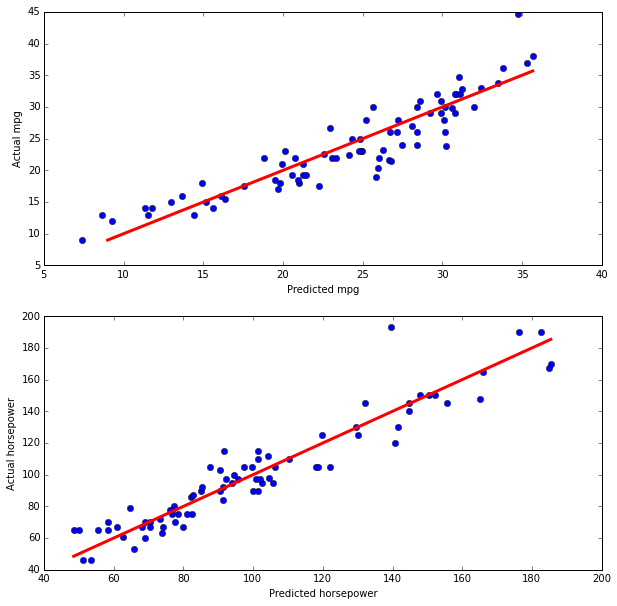

In [77]:
plt.figure(figsize=(10,10))
for p in range(2):
    plt.subplot(2,1,p+1)
    plt.plot(prediction[:,p],Ttest[:,p],'o')
    plt.xlabel("Predicted " + Tnames[p])
    plt.ylabel("Actual " + Tnames[p])
    a = max(min(prediction[:,p]),min(Ttest[:,p]))
    b = min(max(prediction[:,p]),max(Ttest[:,p]))
    plt.plot([a,b],[a,b],'r',linewidth=3)

How well did we do in terms of RMSE?

In [78]:
rmseTrain = np.sqrt(np.mean((np.dot(XtrainS1,w) - Ttrain)**2,axis=0))
rmseTrain

array([  3.418,  12.496])

In [79]:
rmseTest = np.sqrt(np.mean((np.dot(XtestS1,w) - Ttest)**2,axis=0))
rmseTest

array([  2.816,  11.017])

In [80]:
print('Training RMSE: MPG {:4.2f} HP {:4.2f}'.format(*rmseTrain))   #what is that * doing there??
print(' Testing RMSE: MPG {:4.2f} HP {:4.2f}'.format(*rmseTest))

Training RMSE: MPG 3.42 HP 12.50
 Testing RMSE: MPG 2.82 HP 11.02
